# Scikit-Learn

## Prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [3]:
df = pd.read_csv('https://calmcode.io/datasets/drawndata1.csv')

In [4]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [7]:
X =df[['x', 'y']].values
y = df['z'] == "a"

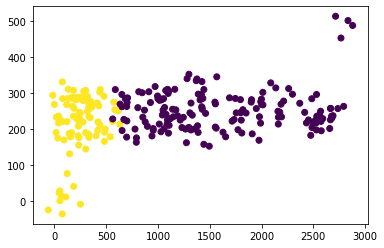

In [9]:
plt.scatter(X[:, 0], X[:, 1], c = y)

### Scaling

- Axes are different scales; scaling will fix this
- SKLearn has a standard scaler
    - calculate the mean and variance of each column
    - x - mean(x) / square root(variance)

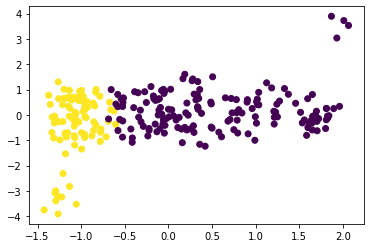

In [10]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c = y)

- y is about 8 units
- x is about 3 1/2 units
- outliers are not corrected

### Quantile

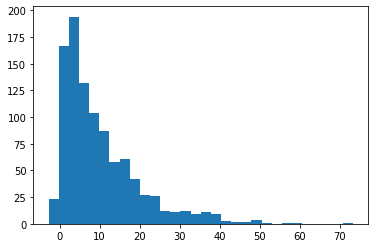

In [13]:
x = np.random.exponential(10, (1000)) + np.random.normal(0, 1, (1000))
plt.hist(x, 30);

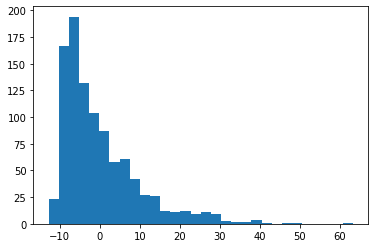

In [14]:
# subtract the mean of the dataset
plt.hist((x - np.mean(x)), 30);

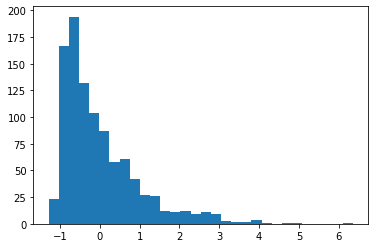

In [15]:
# divide by the standard deviation
plt.hist((x - np.mean(x))/np.std(x), 30);

- x axis is definitely scaled
- but, we still have outliers
- let's come up with a different way to standardize
- fit all `quantiles` (50% of all data to the right of this section, 25% of all data to the right of this section, etc.) evenly across the x axis

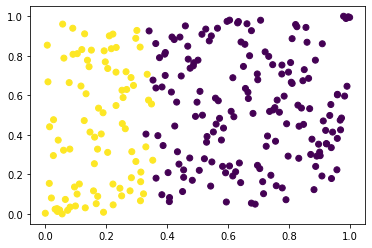

In [18]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

- quantiles have been used to scale the above, instead of the mean and standard deviation